In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import pandas as pd

FONTSIZE=15
DPI=600

In [29]:
ch_1_file_cd = 'channel_1_coastdown_beta_eff_results.pkl'
ch_2_file_cd = 'channel_2_coastdown_beta_eff_results.pkl'
ch_8_file_cd = 'channel_8_coastdown_beta_eff_results.pkl'
ch_1152_file_cd = 'channel_1152_coastdown_beta_eff_results.pkl'

ch_1_file_st = 'channel_1_startup_beta_eff_results.pkl'
ch_2_file_st = 'channel_2_startup_beta_eff_results.pkl'
ch_8_file_st = 'channel_8_startup_beta_eff_results.pkl'
ch_1152_file_st = 'channel_1152_startup_beta_eff_results.pkl'

# open the files now.
with open(ch_1_file_cd, 'rb') as handle:
  ch_1_data_cd = pkl.load(handle)
with open(ch_2_file_cd, 'rb') as handle:
  ch_2_data_cd = pkl.load(handle)
with open(ch_8_file_cd, 'rb') as handle:
  ch_8_data_cd = pkl.load(handle)
with open(ch_1152_file_cd, 'rb') as handle:
  ch_1152_data_cd = pkl.load(handle)

with open(ch_1_file_st, 'rb') as handle:
  ch_1_data_st = pkl.load(handle)
with open(ch_2_file_st, 'rb') as handle:
  ch_2_data_st = pkl.load(handle)
with open(ch_8_file_st, 'rb') as handle:
  ch_8_data_st = pkl.load(handle)
with open(ch_1152_file_st, 'rb') as handle:
  ch_1152_data_st = pkl.load(handle)

delta_beff_1 = (ch_1152_data_st[-0.1] - ch_1_data_cd[-0.1])
delta_beff_2 = (ch_2_data_st[-0.1] - ch_2_data_cd[-0.1])
delta_beff_8 = (ch_8_data_st[-0.1] - ch_8_data_cd[-0.1])
delta_beff_1152 = (ch_1152_data_st[-0.1] - ch_1152_data_cd[-0.1])

In [30]:
print(delta_beff_1)
print(delta_beff_2)
print(delta_beff_8)
print(delta_beff_1152)

0.0021030740949651086
0.0022456585362986524
0.0023278741223404873
0.0023344007740159446


In [31]:
msre_integral_worth = '../../Data/msre_integral_rod_worth.csv'
msre_data = '../../Data/msre_startup_datapoints.csv'

df = pd.read_csv(msre_integral_worth)
data = pd.read_csv(msre_data)

z = df['z'].values
rho = df[' rho'].values
pos = data['pos'].values
time_data = data['time'].values

startup_values = np.interp(pos, z, rho)

startup_base_insertion = startup_values[0]

Text(0.5, 0, 'Time (s)')

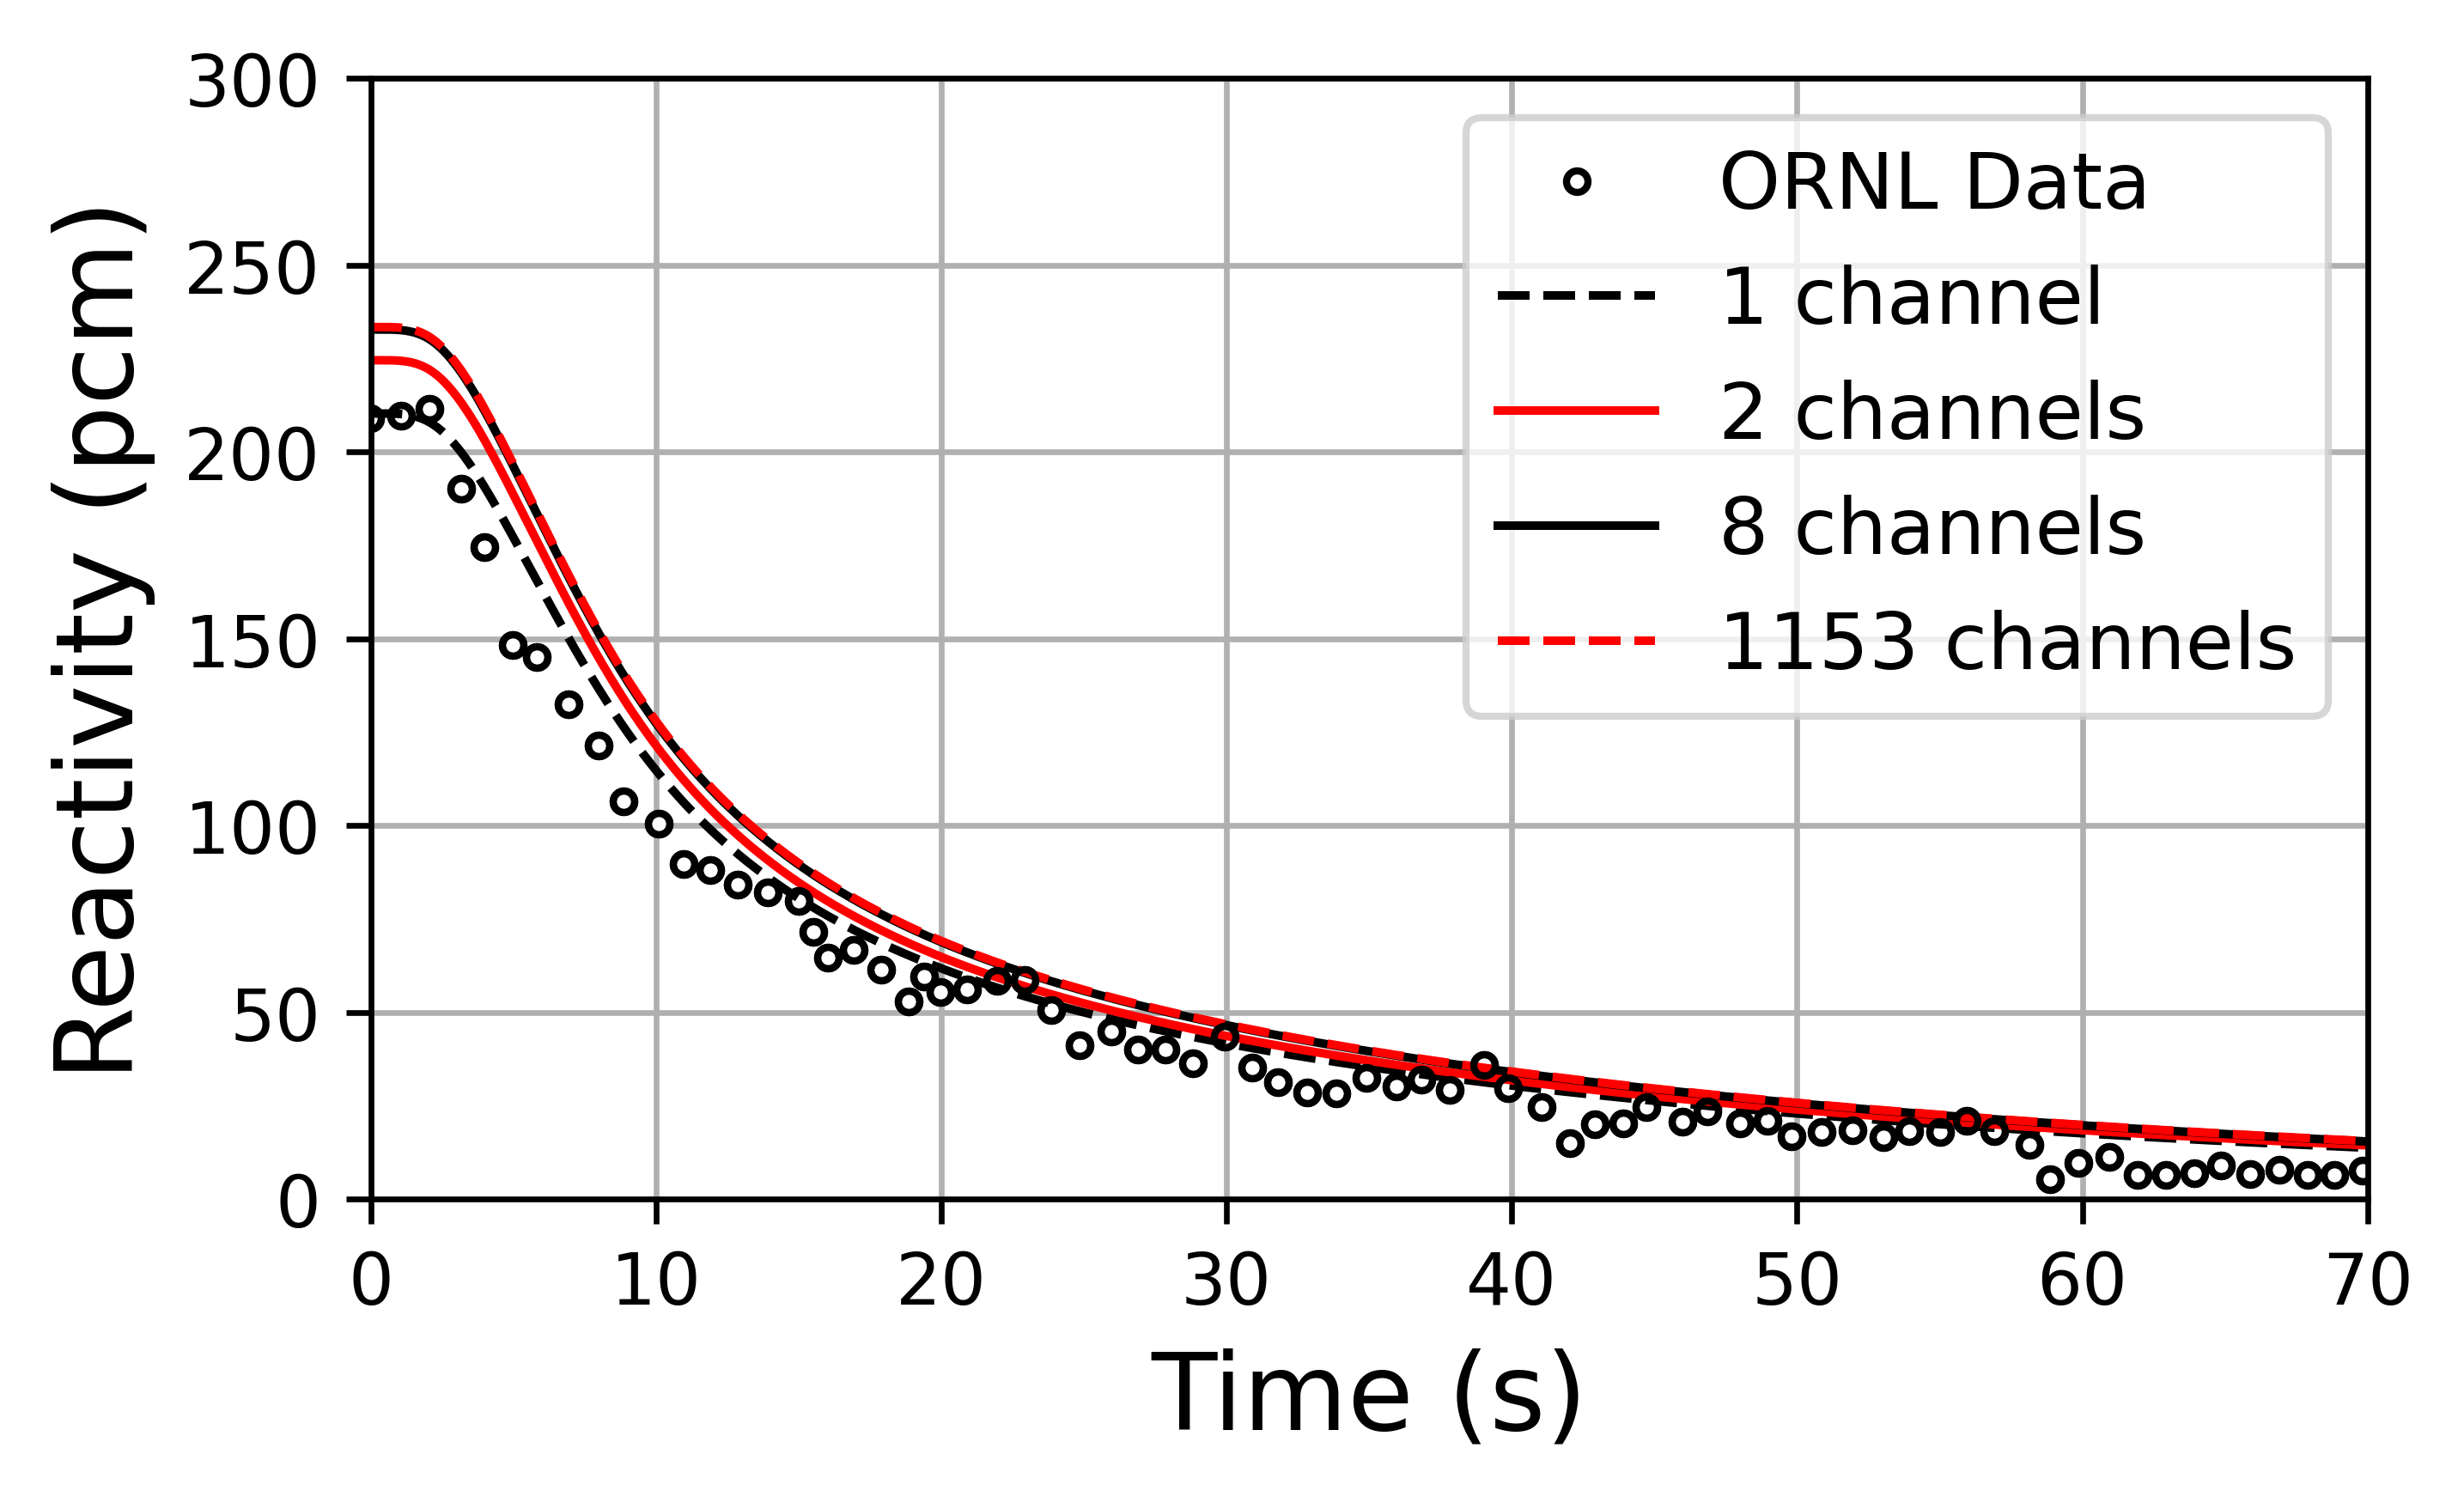

In [81]:
### EXP VALUES ###
msre_integral_worth = '../../Data/msre_integral_rod_worth.csv'
msre_data = '../../Data/msre_coastdown_datapoints.csv'

df = pd.read_csv(msre_integral_worth)
data = pd.read_csv(msre_data)

z = df['z'].values
rho = df[' rho'].values
pos = data['pos'].values
ornl_time_data = data['time'].values

values = np.interp(pos, z, rho)
base_insertion = values[0]

ornl_delta_rho_data = 1000*(values - startup_base_insertion) # this is the data we calculated based on experimental values

# MAKE PLOT
plt.figure(figsize=(5,5/1.77), dpi=DPI)
plt.plot(ornl_time_data, ornl_delta_rho_data, 'ko', markerfacecolor='w', markersize=3)

# COMPUTE STARTING VALUE
beff_no_flow = (0.006478751114635639 - 0.004142410989449852)*10**5

# dummy plot for ornl data
plt.plot([-1e6,-1e6], [-1e6,-1e6], 'ko', markerfacecolor='none', markersize=3, label='ORNL Data')


### MY VALUES ###
x_1 = np.array(list(ch_1_data_cd.keys()))
y_1 = ch_1_data_cd[-0.1] - np.array(list(ch_1_data_cd.values())) + delta_beff_1

x_2 = np.array(list(ch_2_data_cd.keys()))
y_2 = ch_2_data_cd[-0.1] - np.array(list(ch_2_data_cd.values())) + delta_beff_2

x_8 = np.array(list(ch_8_data_cd.keys()))
y_8 = ch_8_data_cd[-0.1] - np.array(list(ch_8_data_cd.values())) + delta_beff_8

x_1152 = np.array(list(ch_1152_data_cd.keys()))
y_1152 = ch_1152_data_cd[-0.1] - np.array(list(ch_1152_data_cd.values())) + delta_beff_1152

plt.plot(x_1, y_1*10**5, 'k--', linewidth=1.2, label='1 channel')
plt.plot(x_2, y_2*10**5, 'r-', linewidth=1.2, label='2 channels')
plt.plot(x_8, y_8*10**5, 'k-', linewidth=1.2, label='8 channels')
plt.plot(x_1152, y_1152*10**5, 'r--', linewidth=1.2, label='1153 channels')


stepsize = 300
# plt.plot(x_1[0::stepsize], y_1[0::stepsize]*10**5, 'ks', label='', markerfacecolor='none', markersize=3)
# plt.plot(x_2[0::stepsize], y_2[0::stepsize]*10**5, 'k^', label='', markerfacecolor='none', markersize=3)
# plt.plot(x_8[0::stepsize], y_8[0::stepsize]*10**5, 'ko', label='', markerfacecolor='none', markersize=3)
# plt.plot(x_1152[0::stepsize], y_1152[0::stepsize]*10**5, 'k*', label='', markerfacecolor='none', markersize=3)


# MAKE PLOT
plt.plot(ornl_time_data, ornl_delta_rho_data, 'ko', markerfacecolor='none', markersize=3)

# OTHER PLOTTING STUFF
plt.grid()
plt.xlim([0,70])
plt.ylim([0,300])
plt.legend(loc='upper right', fontsize=11, ncol=1)
plt.ylabel('Reactivity (pcm)', fontsize=FONTSIZE)
plt.xlabel('Time (s)', fontsize=FONTSIZE)

In [33]:
ch_1_data_cd[-0.1]

np.float64(0.0043756770597340325)

In [34]:
delta_beff_1

np.float64(0.0021030740949651086)

In [41]:
ch_1_data_cd

{np.float64(-0.1): np.float64(0.0043756770597340325),
 np.float64(-0.08998899889989): np.float64(0.0043756770597340325),
 np.float64(-0.07997799779977999): np.float64(0.0043756770597340325),
 np.float64(-0.06996699669966996): np.float64(0.004375677059734033),
 np.float64(-0.05995599559955996): np.float64(0.004375677059734033),
 np.float64(-0.04994499449944995): np.float64(0.004375677059734033),
 np.float64(-0.03993399339933994): np.float64(0.0043756770597340325),
 np.float64(-0.029922992299229928): np.float64(0.0043756770597340325),
 np.float64(-0.01991199119911992): np.float64(0.004375677059734033),
 np.float64(-0.00990099009900991): np.float64(0.004375677059734033),
 np.float64(0.00011001100110009931): np.float64(0.004375677059734033),
 np.float64(0.010121012101210108): np.float64(0.004375677059734034),
 np.float64(0.02013201320132013): np.float64(0.004375677059734034),
 np.float64(0.030143014301430127): np.float64(0.004375677059734033),
 np.float64(0.04015401540154015): np.float64(0